<a href="https://colab.research.google.com/github/victoraccete/ciencia-de-dados-2020.1/blob/main/Lista_2_Quest%C3%B5es_6_7_8_Ci%C3%AAncia%20de%20Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questão 6**
Criando os dados conforme pedido no questão.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.DataFrame({'Janeiro': [160, 160], 'Fevereiro': [184, 184], 'Março': [241, 237], 
                   'Abril': [149, 148], 'Maio': [180, 181], 'Junho': [161, 150], 
                   'Julho': [132, 123], 'Agosto': [202, 156], 'Setembro': [160, 126], 
                   'Outubro': [139, 104], 'Novembro': [149, 124], 'Dezembro': [177, 140]})
df = df.rename(index={0: 'Recebidos', 1: 'Processados'}).reset_index().rename(columns={'index':'status'})
df

,status,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,Recebidos,160,184,241,149,180,161,132,202,160,139,149,177
1,Processados,160,184,237,148,181,150,123,156,126,104,124,140


Ajustando o DataFrame para ficar num formato mais trabalhável.

In [60]:
months = list(df.columns)[1:]
df = pd.melt(df, id_vars='status', value_vars=months).rename(columns={'variable': 'Mês', 'value': 'Valor'})
df.head()

,status,Mês,Valor
0,Recebidos,Janeiro,160
1,Processados,Janeiro,160
2,Recebidos,Fevereiro,184
3,Processados,Fevereiro,184
4,Recebidos,Março,241


Plotando o gráfico:

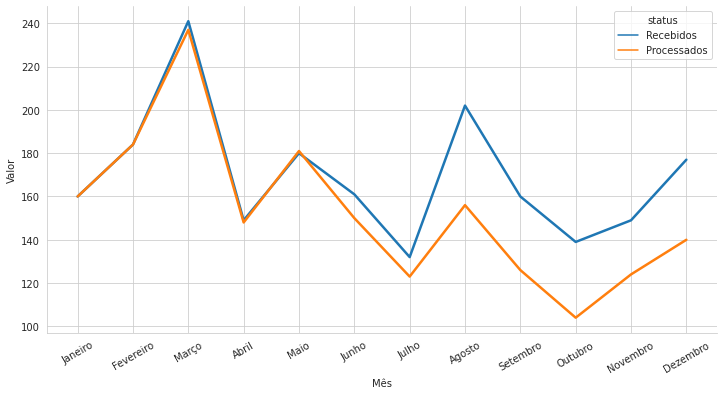

In [61]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Mês', y='Valor', hue='status', linewidth=2.5)
plt.xticks(rotation=30)
sns.despine()
plt.show()

# **Questão 7**
Criando os dados conforme pedido no questão.

In [62]:
text_df = pd.DataFrame({'Texto': ['They are novels', 'have you read this book', 
                                  'who is the author', 'what are the characters',
                                  'This is how I bought the book', 'I like fictions',
                                  'what is your favorite book', 'This is my book'],
                        'Classe': ['stmt', 'question', 'question', 'question', 'stmt',
                                   'stmt', 'question', 'stmt']})
text_df

,Texto,Classe
0,They are novels,stmt
1,have you read this book,question
2,who is the author,question
3,what are the characters,question
4,This is how I bought the book,stmt
5,I like fictions,stmt
6,what is your favorite book,question
7,This is my book,stmt


Pequeno preprocessamento:

In [63]:
from nltk import stem
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

In [64]:
text_df['Texto'] = text_df['Texto'].map(lambda s: s.lower())
text_df

,Texto,Classe
0,they are novels,stmt
1,have you read this book,question
2,who is the author,question
3,what are the characters,question
4,this is how i bought the book,stmt
5,i like fictions,stmt
6,what is your favorite book,question
7,this is my book,stmt


https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

TDM = term document matrix

In [65]:
inputs = text_df['Texto']
labels = text_df['Classe']

count_vect = CountVectorizer()
input_counts = count_vect.fit_transform(inputs)
transformer = TfidfTransformer().fit(input_counts)
input_counts = transformer.transform(input_counts)
input_counts

<8x21 sparse matrix of type '<class 'numpy.float64'>'
	with 33 stored elements in Compressed Sparse Row format>

Classificando:

In [66]:
txt = ['what do you mean']
txt = count_vect.transform(txt)
txt = transformer.transform(txt)
txt 

<1x21 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [67]:
clf = MultinomialNB().fit(input_counts, labels)
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [68]:
predicted = clf.predict(txt)
print("Classificação:", predicted)

Classificação: ['question']


# **Questão 8**
Dados: https://github.com/bapimentel/Ciencia-de-Dados/blob/master/Dados/Drugs.csv

In [69]:
drugs = pd.read_csv('https://raw.githubusercontent.com/bapimentel/Ciencia-de-Dados/master/Dados/Drugs.csv')
drugs.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [70]:
drugs['date'] = pd.to_datetime(drugs['date'])
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


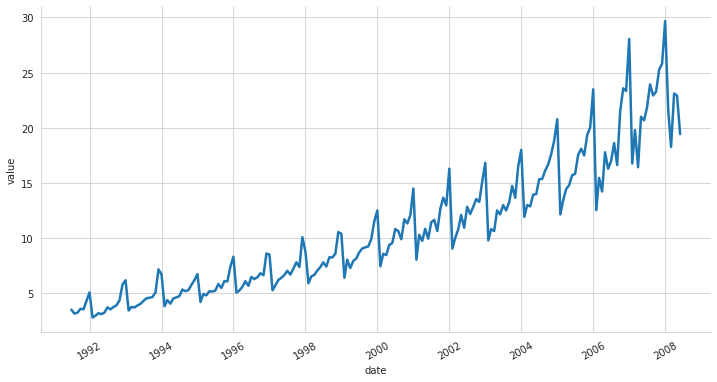

In [71]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=drugs, x='date', y='value', linewidth=2.5)
plt.xticks(rotation=30)
sns.despine()
plt.show()

**Discussão:**  
Podemos ver claramente que existe sazonalidade e que há uma tendência crescente. Podemos ver isso mais claramente no gráfico abaixo, que separa a tendência e a sazonalidade do gráfico. 

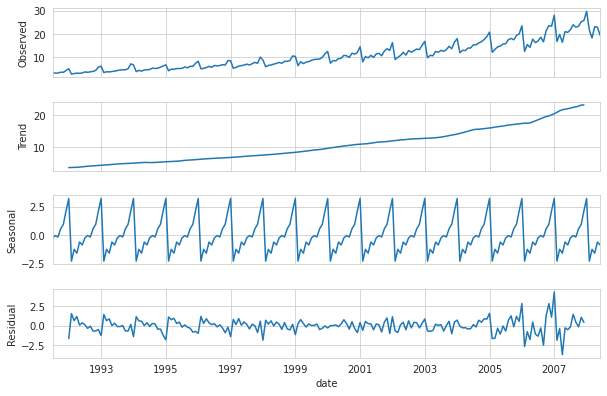

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
drugs_series = drugs.set_index('date')
result = seasonal_decompose(drugs_series, model='additive')
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
fig = result.plot()
fig.set_figheight(6)
fig.set_figwidth(9)

Vamos usar um intervalo menor para podermos ver os meses para averiguarmos com mais precisão a sazonalidade. 

In [107]:
import datetime as dt
drugs_98_00 = drugs[drugs['date'].dt.year >= 1998]
drugs_98_00 = drugs_98_00[drugs['date'].dt.year <= 2000]
drugs_98_00.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,date,value
78,1998-01-01,8.798513
79,1998-02-01,5.918261
80,1998-03-01,6.534493
81,1998-04-01,6.675736
82,1998-05-01,7.064201


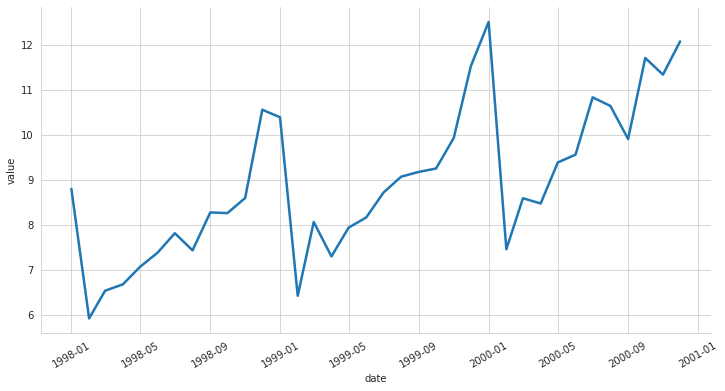

In [108]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=drugs_98_00, x='date', y='value', linewidth=2.5)
plt.xticks(rotation=30)
sns.despine()
plt.show()

Podemos ver agora mais claramente os meses de pico e os meses de queda. Por exemplo, do mês 1 ao mês 2 há uma queda brusca e após essa queda, há uma lenta tendência para cima, antes de despencar de novo. 